In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv(r"D:\Aishwarya\Ml_end_to_end\artifacts\data.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
train_data = pd.read_csv(r"D:\Aishwarya\Ml_end_to_end\artifacts\train.csv")
test_data = pd.read_csv(r"D:\Aishwarya\Ml_end_to_end\artifacts\test.csv")

train_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,female,group D,master's degree,standard,none,69.00
1,female,group C,bachelor's degree,free/reduced,completed,77.33
2,female,group D,some college,free/reduced,none,84.67
3,male,group C,master's degree,free/reduced,none,64.67
4,male,group E,high school,standard,none,64.67


In [5]:
test_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,female,group C,associate's degree,standard,none,87.00
1,female,group B,some college,free/reduced,completed,64.00
2,male,group D,bachelor's degree,standard,none,75.00
3,male,group C,some college,free/reduced,none,74.67
4,male,group E,some college,standard,completed,81.67


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       800 non-null    object 
 1   race/ethnicity               800 non-null    object 
 2   parental level of education  800 non-null    object 
 3   lunch                        800 non-null    object 
 4   test preparation course      800 non-null    object 
 5   average_score                800 non-null    float64
dtypes: float64(1), object(5)
memory usage: 37.6+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       200 non-null    object 
 1   race/ethnicity               200 non-null    object 
 2   parental level of education  200 non-null    object 
 3   lunch                        200 non-null    object 
 4   test preparation course      200 non-null    object 
 5   average_score                200 non-null    float64
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


In [8]:
# split of train and test data into features and target
xtrain = train_data.drop(columns = ['average_score'])
ytrain = train_data['average_score']

xtest = test_data.drop(columns=['average_score'])
ytest = test_data['average_score']

In [9]:
cat_cols = train_data.select_dtypes(include=['object']).columns.tolist()
num_cols = train_data.select_dtypes(exclude=['object']).columns.tolist()

In [10]:
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [11]:
# transform the categorical columns into numerical columns

transformer = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# lets first transform the data once to prevent overhead in the loop
xtrain_transformed = transformer.fit_transform(xtrain[cat_cols])
# lets check the shape of the transformed data
print(xtrain_transformed.shape)
xtest_transformed = transformer.transform(xtest[cat_cols])
# lets check the shape of the transformed
print(xtest_transformed.shape)



models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor()
}

def fit_models(models, xtrain, ytrain, xtest, ytest):
    best_mae = float('inf')
    best_model = None
    best_r2 = float('inf')
    for name, model in models.items():
        print(f"Training {name} model...")
        model.fit(xtrain,ytrain)
        mae = mean_absolute_error(ytest, model.predict(xtest))
        r2 = r2_score(ytest, model.predict(xtest))
        print(f"MAE: {mae}")
        print(f"R2 : {r2}")

        if(mae < best_mae) or (best_model is None):
            best_mae = mae
            best_model = model
            best_r2 = r2

    print(f"Best model : {best_model} , mae : {best_mae}, r2 : {best_r2}")
    return best_model

best_model = fit_models(models, xtrain_transformed, ytrain, xtest_transformed, ytest)

# fit the transformer on the training data
# pipeline = Pipeline(steps = [
#     ('transformer', transformer),
#     ('model', model)
# ])

(800, 17)
(200, 17)
Training RandomForest model...
MAE: 11.495125815224236
R2 : -0.021258193017236415
Training LinearRegression model...
MAE: 10.490291354411788
R2 : 0.16217132593703398
Training XGBoost model...
MAE: 11.795326905822755
R2 : -0.0725194272303995
Best model : LinearRegression() , mae : 10.490291354411788, r2 : 0.16217132593703398


In [12]:
for col in cat_cols:
    print(train_data.groupby(col)['average_score'].mean())

gender
female    70.110855
male      66.012137
Name: average_score, dtype: float64
race/ethnicity
group A    64.700000
group B    65.394510
group C    67.476808
group D    69.368069
group E    73.355948
Name: average_score, dtype: float64
parental level of education
associate's degree    69.901229
bachelor's degree     72.989896
high school           63.560126
master's degree       71.772979
some college          68.657088
some high school      65.992263
Name: average_score, dtype: float64
lunch
free/reduced    62.282671
standard        71.286750
Name: average_score, dtype: float64
test preparation course
completed    73.427670
none         65.353071
Name: average_score, dtype: float64


the above distribution of categorical columns over mean of target column tells some predictive powers in the categories
which might have been misunderstood by sparse OHE features earlier so we'll use target encoding this time

In [13]:
# target encoding categorical columns now

import category_encoders as ce

encoder = ce.TargetEncoder(cols=cat_cols)

xtrain_encoded = encoder.fit_transform(xtrain[cat_cols], ytrain)
xtest_encoded = encoder.transform(xtest[cat_cols])

In [14]:
xtrain_encoded

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,70.110855,69.368069,71.546030,71.286750,65.353071
1,70.110855,67.476808,72.987484,62.282671,73.427670
2,70.110855,69.368069,68.657088,62.282671,65.353071
3,66.012137,67.476808,71.546030,62.282671,65.353071
4,66.012137,73.355597,63.560130,71.286750,65.353071
...,...,...,...,...,...
795,70.110855,69.368069,71.546030,71.286750,65.353071
796,66.012137,67.476808,72.987484,71.286750,65.353071
797,70.110855,67.476808,69.901229,71.286750,65.353071
798,66.012137,67.476808,68.657088,62.282671,73.427670


In [15]:
best_model2 = fit_models(models, xtrain_encoded, ytrain, xtest_encoded, ytest)

Training RandomForest model...
MAE: 11.534020625723779
R2 : -0.03960153942371303
Training LinearRegression model...
MAE: 10.44024295877236
R2 : 0.1647398833350674
Training XGBoost model...
MAE: 11.791269041442872
R2 : -0.08749294503632021
Best model : LinearRegression() , mae : 10.44024295877236, r2 : 0.1647398833350674


<Axes: xlabel='average_score', ylabel='Count'>

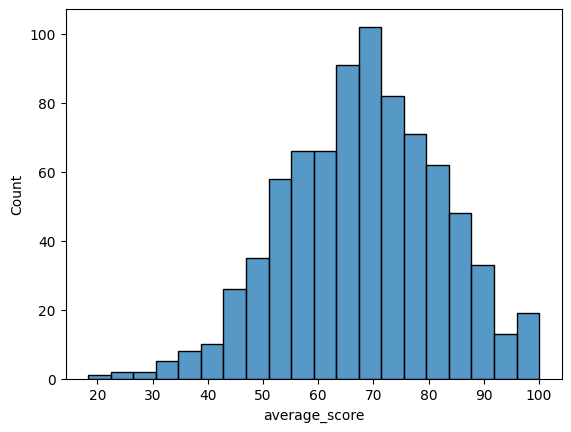

In [16]:
sns.histplot(train_data['average_score'])

### Modeling on complete data - taking math_score as the target column while other 2 score columns as features - due to poo prediction for average score 

In [17]:
data = pd.read_csv(r"D:\Aishwarya\Ml_end_to_end\notebook\data\StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
x = data.drop(columns = ['math score'])
y = data['math score']

x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [19]:
# train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 40)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((750, 7), (250, 7), (750,), (250,))

In [20]:
cat_cols = x.select_dtypes(include=['object']).columns.tolist()
num_cols = x.select_dtypes(exclude=['object']).columns.tolist()
cat_cols, num_cols

(['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'],
 ['reading score', 'writing score'])

In [22]:
# applying transformation on  both category and numeric ones
transformer = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

xtrain_trf = transformer.fit_transform(xtrain)
xtest_trf = transformer.transform(xtest)

cat_features = transformer.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = list(cat_features) + num_cols

xtrain_trf = pd.DataFrame(xtrain_trf.toarray() if hasattr(xtrain_trf, 'toarray') else xtrain_trf, columns = all_features)
xtest_trf = pd.DataFrame(xtest_trf.toarray() if hasattr(xtest_trf, 'toarray') else xtest_trf, columns = all_features)

xtrain_trf.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,reading score,writing score
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-2.758219,-2.506150
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.159996,-0.331207
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.455373,0.130145
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.386998,0.591497
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.728870,0.459682


In [23]:
xtest_trf.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,reading score,writing score
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.937727,-1.715262
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.980487,-0.331207
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.096356,2.041459
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.592121,0.525589
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.117236,-0.660744


In [26]:
# now model train
best_model3 = fit_models(models, xtrain_trf, ytrain, xtest_trf, ytest)

Training RandomForest model...
MAE: 5.19166
R2 : 0.821440686876445
Training LinearRegression model...
MAE: 4.529008580312644
R2 : 0.8580185073989934
Training XGBoost model...
MAE: 5.524084568023682
R2 : 0.78443843126297
Best model : LinearRegression() , mae : 4.529008580312644, r2 : 0.8580185073989934


We can clearly see that the r2score increased significantly !

In [3]:
# trying for hyperparameter tuning below

models = {
                "LinearRegression": 'LinearRegression()',
                "DecisionTreeRegressor": 'DecisionTreeRegressor()',
                
            }

for i in range(len(list(models))):
    print(f"Model {i+1} : {list(models)[i]}")
#     print(models[list(models)[i]])

print(list(models))

Model 1 : LinearRegression
Model 2 : DecisionTreeRegressor
['LinearRegression', 'DecisionTreeRegressor']


Our idea on how to use hyperparameter tuning : 
- create a params_grid - not with all specified columns - then while using that in code just use if(model_name not in param_grid) we simply fit using models[i]
- else we fit the grid object 
- and note that for each model we'll get the best model with the best set of parameters
